In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture
import matplotlib.gridspec as gs
import sklearn.utils
import seaborn as sns
import scipy.stats

In [3]:
pd.options.display.float_format = "{:.4}".format

In [4]:
sys.path.insert(0, "..")

In [5]:
from hmm import GaussianVariationalHMM, GaussianHMM, plots

In [6]:
from hmm.datasets.basic import load_old_faithful_duration, load_old_faithful_waiting

In [7]:
waiting = load_old_faithful_waiting()
duration = load_old_faithful_duration()

In [8]:
waiting_times = waiting["data"][None, :]
duration_times = duration["data"][None, :]

In [9]:
waiting_times.shape

(1, 299)

In [10]:
duration_hmm = GaussianVariationalHMM.GaussianVariationalHMM(n_components=5, n_iterations=500, n_inits=5)
waiting_hmm = GaussianVariationalHMM.GaussianVariationalHMM(n_components=5, n_iterations=500, n_inits=5)
duration_em_hmm = GaussianHMM.GaussianHMM(n_components=3, n_iterations=500, n_inits=5)
waiting_em_hmm = GaussianHMM.GaussianHMM(n_components=3, n_iterations=500, n_inits=5)

In [11]:
duration_hmm.fit(duration_times)
duration_hmm.num_free_params()

21

In [12]:
duration_em_hmm.fit(duration_times)


GaussianHMM(allowed_to_use_log=True, implementation='scaling',
      init_A='random', init_emissions='kmeans', init_pi='random',
      n_components=3, n_inits=5, n_iterations=500, n_jobs=-1,
      random_state=None, tol=1e-06, variance_regularization=1e-06,
      verbose=0)

In [13]:
waiting_em_hmm.fit(waiting_times)


GaussianHMM(allowed_to_use_log=True, implementation='scaling',
      init_A='random', init_emissions='kmeans', init_pi='random',
      n_components=3, n_inits=5, n_iterations=500, n_jobs=-1,
      random_state=None, tol=1e-06, variance_regularization=1e-06,
      verbose=0)

In [13]:
waiting_hmm.fit(waiting_times)
waiting_hmm.num_free_params()

22

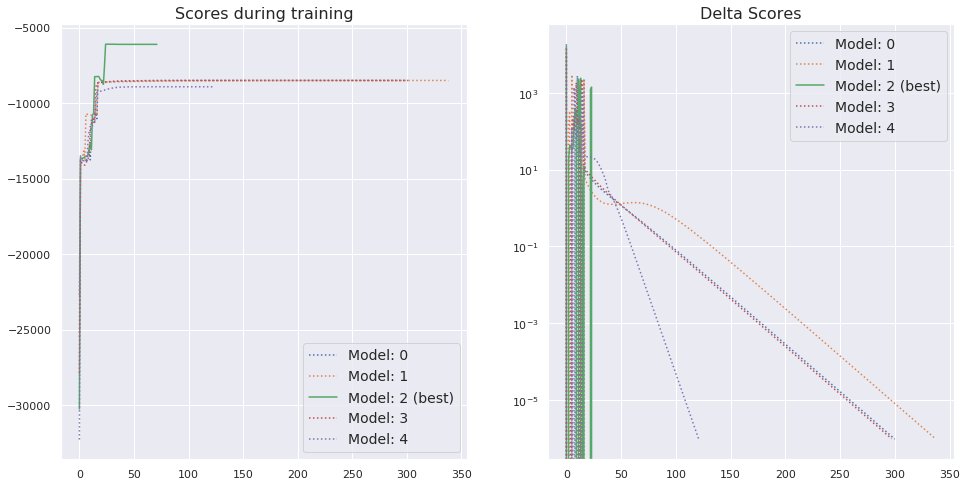

In [15]:
_ = plots.multiple_learning_plot(waiting_hmm.explored_free_energies_)

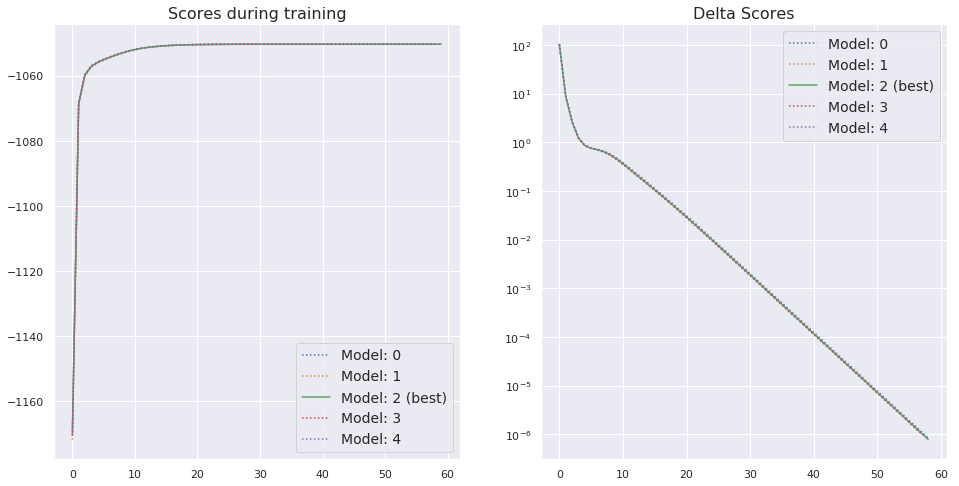

In [16]:
_ = plots.multiple_learning_plot(waiting_em_hmm.explored_loglikelihoods_)

In [17]:
for lls in waiting_em_hmm.explored_loglikelihoods_:
    print(lls[0])

-1168.2651622564902
-1171.7271964242568
-1170.0580727349522
-1170.6118297836656
-1169.9809141755795


In [18]:
duration_states = duration_hmm.transform(duration_times)
duration_em_states = duration_em_hmm.transform(duration_times)

In [19]:
waiting_states = waiting_hmm.transform(waiting_times)
waiting_em_states = waiting_em_hmm.transform(waiting_times)

In [20]:
pd.Series(duration_hmm.means_posterior_)

0     0.0
1   1.967
2     0.0
3   4.243
4     0.0
dtype: float64

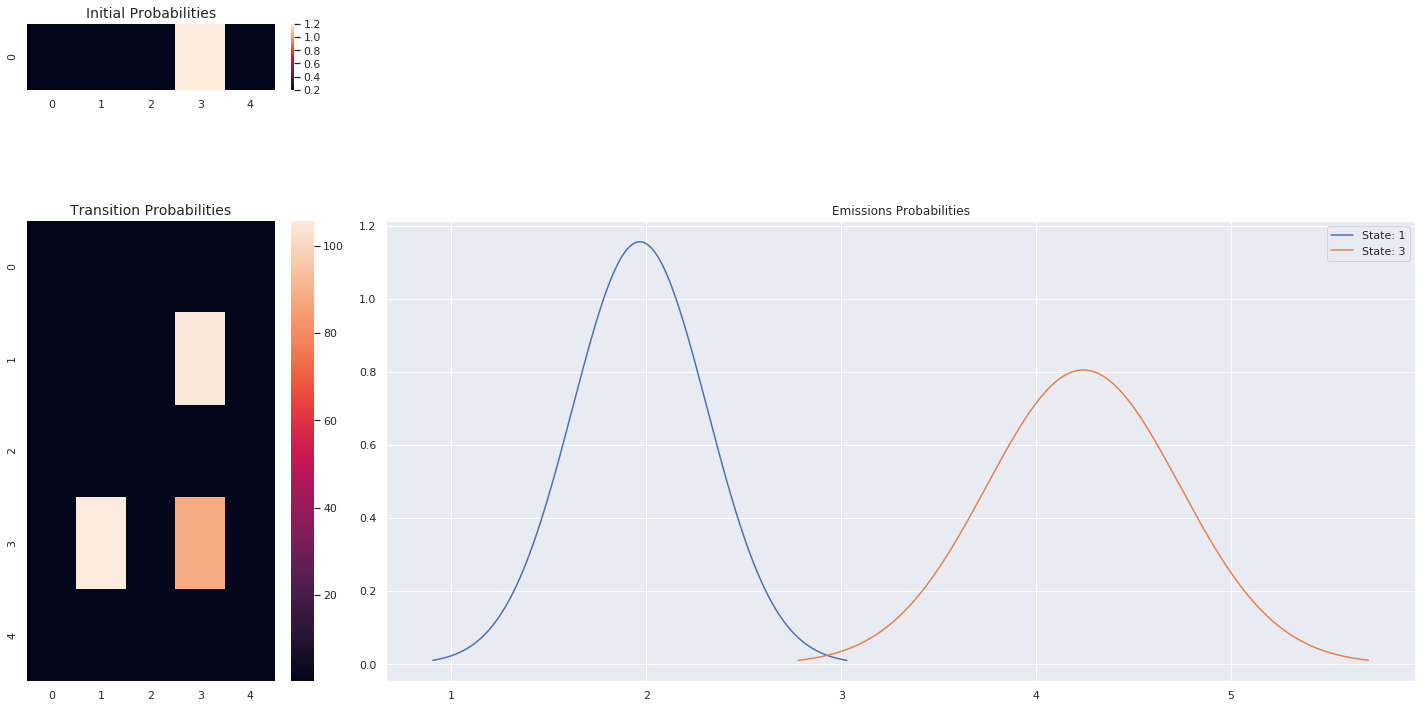

In [21]:
_ = plots.gaussian_hinton_diagram(
    duration_hmm.pi_counts_,
    duration_hmm.A_counts_,
    duration_hmm.means_posterior_,
    duration_hmm.variances_posterior_
)

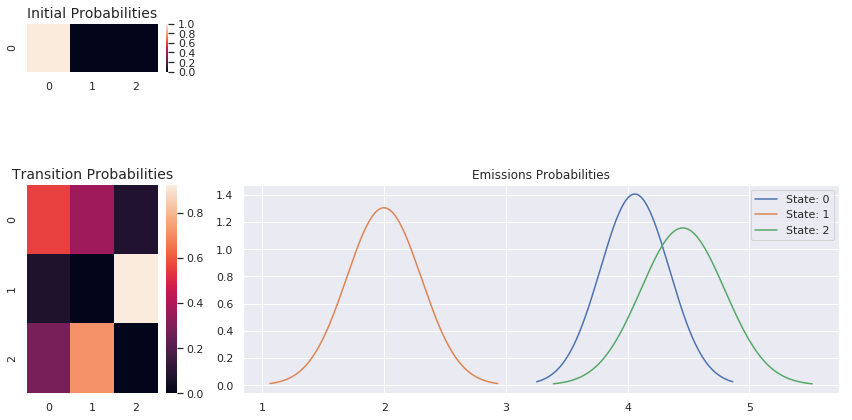

In [22]:
_ = plots.gaussian_hinton_diagram(
    duration_em_hmm.pi_,
    duration_em_hmm.A_,
    duration_em_hmm.means_,
    duration_em_hmm.variances_
)

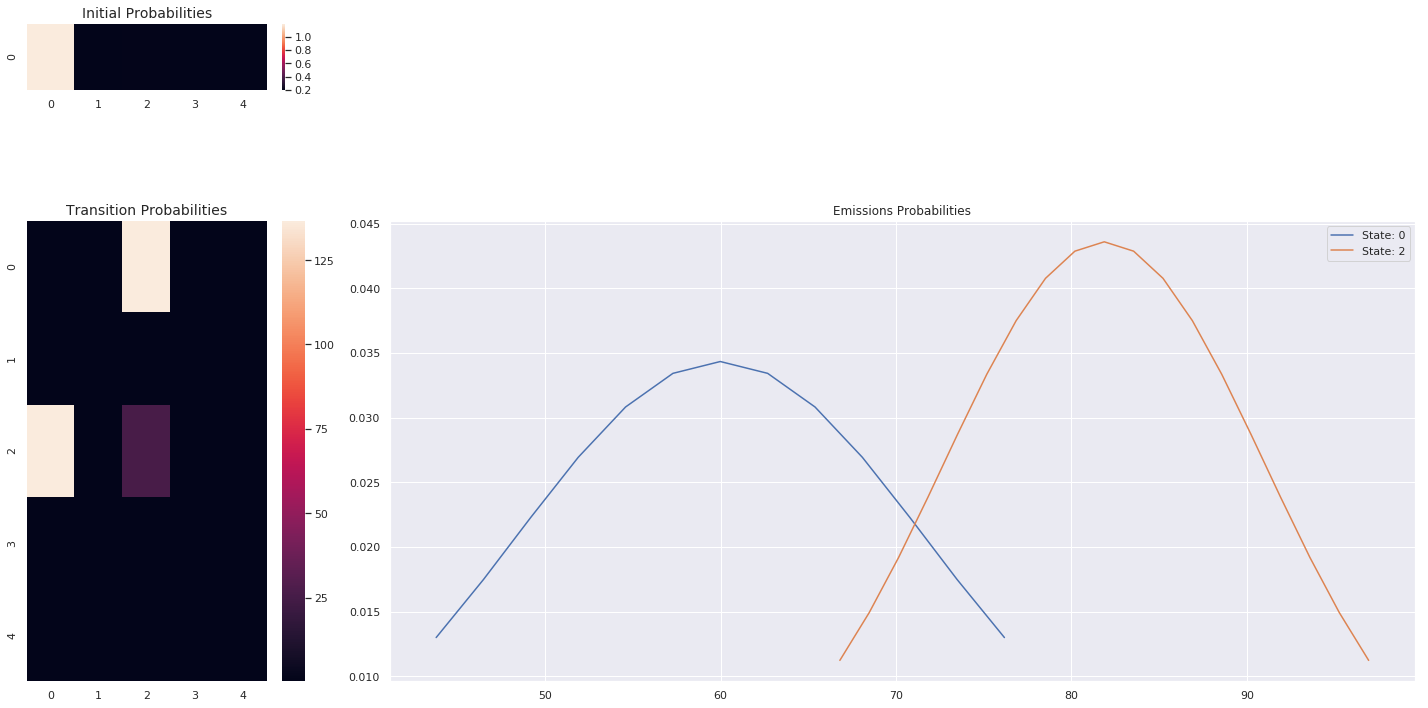

In [23]:
_ = plots.gaussian_hinton_diagram(
    waiting_hmm.pi_counts_,
    waiting_hmm.A_counts_,
    waiting_hmm.means_posterior_,
    waiting_hmm.variances_posterior_
)

In [24]:
_ = plots.gaussian_hinton_diagram(
    waiting_em_hmm.pi_,
    waiting_em_hmm.A_,
    waiting_em_hmm.means_,
    waiting_em_hmm.variances_
)

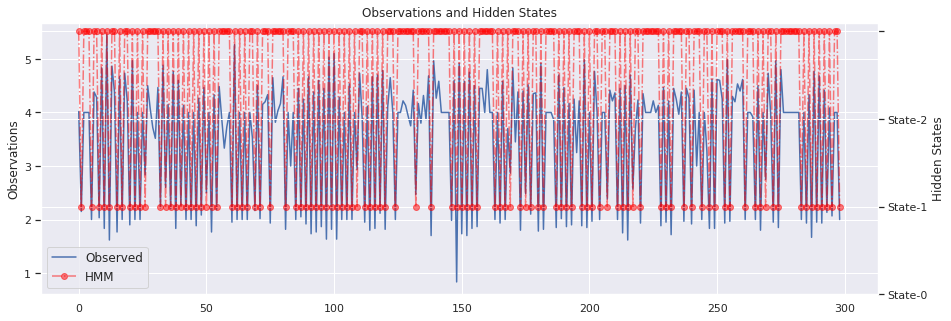

In [25]:
_ = plots.plot_hmm_states(duration_times[0], duration_states[0])

In [26]:
_ = plots.plot_hmm_states(duration_times[0], duration_em_states[0])

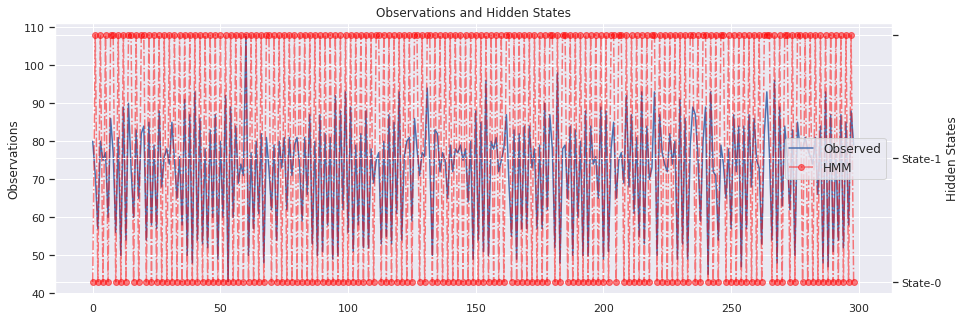

In [27]:
_ = plots.plot_hmm_states(waiting_times[0], waiting_states[0])

In [28]:
_ = plots.plot_hmm_states(waiting_times[0], waiting_em_states[0])

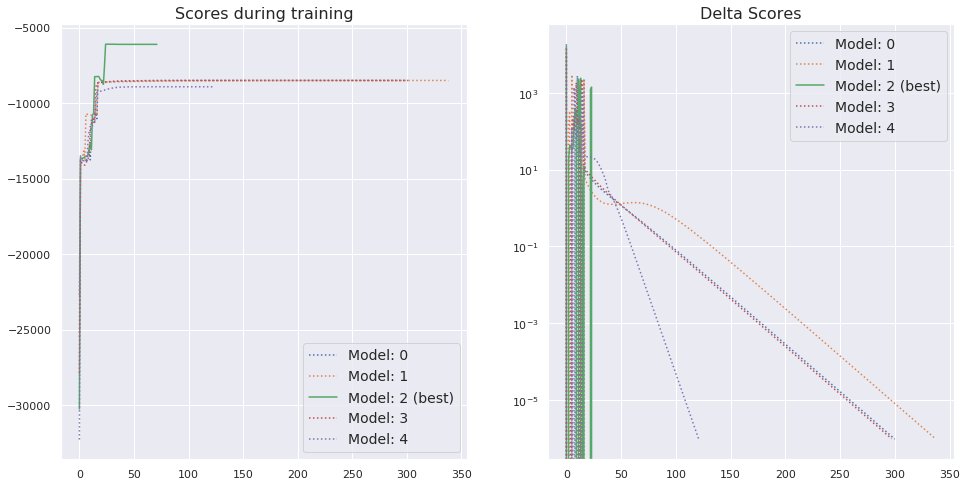

In [29]:
_ = plots.multiple_learning_plot(waiting_hmm.explored_free_energies_)

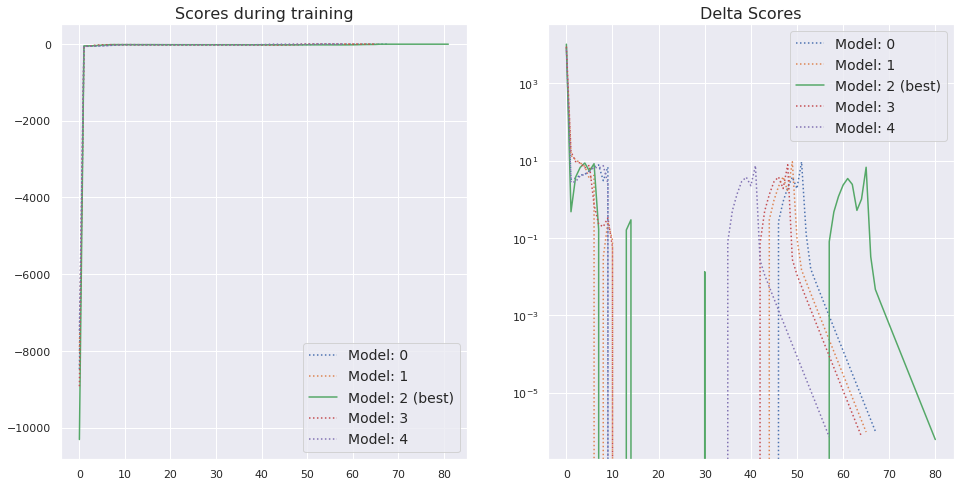

In [30]:
_ = plots.multiple_learning_plot(duration_hmm.explored_free_energies_)

In [31]:
waiting_hmm.free_energy_

[-30265.132809328014,
 -13643.690531088976,
 -13670.467194994175,
 -13652.228350683297,
 -13610.506534490258,
 -13568.019505629016,
 -13535.979961531382,
 -13497.943347532171,
 -13377.159067655191,
 -12975.34256260796,
 -12619.250915748202,
 -13094.104345523921,
 -10794.216386041066,
 -10679.287262329986,
 -8242.983817471577,
 -8247.02318492173,
 -8243.453362798195,
 -8231.294836110874,
 -8262.887662259072,
 -8421.54867272706,
 -8490.767302939432,
 -8513.65753892088,
 -8754.832918913808,
 -7530.660174337627,
 -6098.2384707979945,
 -6098.25583484478,
 -6098.381683153949,
 -6098.632971649298,
 -6099.040362911489,
 -6099.649559773606,
 -6100.517111592149,
 -6101.690358773095,
 -6103.154312686835,
 -6104.748372930433,
 -6106.165819669105,
 -6107.200437795499,
 -6107.9052305907435,
 -6108.386324152604,
 -6108.714112765029,
 -6108.936944233313,
 -6109.088302321663,
 -6109.191086290972,
 -6109.260878724624,
 -6109.308267593834,
 -6109.340443949233,
 -6109.362291007399,
 -6109.377124597884,
 -

In [32]:
np.sqrt(waiting_hmm.variances_posterior_)

array([11.61958225,  1.        ,  9.1519131 ,  1.        ,  1.        ])

### simple two-state

In [33]:
def get_data():
    random_state = sklearn.utils.check_random_state(2)
    pi = [.5, .5]
    A = [
        [.7, .3],
        [.3, .7],
    ]
    means = [-10, 5]
    variances = [5, 3]

    model = GaussianHMM.GaussianHMM(init_pi=False, init_A=False, init_means=False, init_variances=False)
    model.pi_ = pi
    model.A_ = A
    model.means_ = means
    model.variances_ = variances
    observed_sequences, hidden_sequences = model.sample(10, 100, random_state=random_state)
    return observed_sequences, hidden_sequences


In [34]:
observed, hidden = get_data()

TypeError: __init__() got an unexpected keyword argument 'init_means'

In [ ]:
import logging
def compare_estimators(observed, hidden, n_components, n_iterations, n_inits, random_state=None):
    estimators = {
        "em": GaussianHMM.GaussianHMM(
            n_components=n_components,
            n_iterations=n_iterations, 
            n_inits=n_inits,
            random_state=random_state,
        ),
        "var":GaussianVariationalHMM.GaussianVariationalHMM(
            n_components=n_components,
            n_iterations=n_iterations,
            n_inits=n_inits,
        )
    }
    
    for name, estimator in estimators.items():
        estimator.fit(observed)
        predicted = estimator.transform(observed)
        plot = plots.plot_hmm_states(observed[0], predicted[0])
        plot.suptitle("Estimator: {}".format(name))
        
        if name == "var":
            plot = plots.gaussian_hinton_diagram(
                estimator.pi_normalized_, 
                estimator.A_normalized_, 
                estimator.means_posterior_,
                estimator.variances_posterior_
            )
        elif name == "em":
            plot = plots.gaussian_hinton_diagram(
                estimator.pi_, 
                estimator.A_, 
                estimator.means_,
                estimator.variances_
            )
        else:
            assert False
        plot.suptitle("Estimator: {}".format(name))
        
        if name == "var":
            plot = plots.multiple_learning_plot(estimator.explored_free_energies_)
        elif name == "em":
            plot = plots.multiple_learning_plot(estimator.explored_loglikelihoods_)

        else:
            assert False
        plot.suptitle("Estimator: {}".format(name))
    return estimators

In [ ]:
estimators = compare_estimators(observed, hidden, 4, 500, 4)

In [ ]:
waiting_predicted = waiting_hmm.transform(waiting_times).ravel()

In [ ]:
np.sqrt(np.var(waiting_times.ravel()[waiting_predicted == 0]))

In [ ]:
np.sqrt(np.var(waiting_times.ravel()[waiting_predicted == 1]))

In [ ]:
waiting_hmm.means_posterior_